<a href="https://colab.research.google.com/github/vafter341ew/COLAB/blob/main/Copy_of_Handout11_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #11 - Part B: Deletion Statistics

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Used Cars - Chevy Impala Dataset

Consider the following data collected from the FindCars.com website.  Findcars provides information on cars for sale in our geographic region.  
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li>Car Type: Chevy Impala</li>
        <li>Response Variable: Price ($)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Miles; Number of miles on vehicle</li>
          <li>Age; Age of vehicle</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=1yD5Q9bPD3PlBTOFQMvpkpv4LonvfYcZC" width="50%" height="50%"></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>




## Loading data into COLAB

First, loading the tidyverse() package into COLAB.

In [2]:
#load tidyverse package
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Next, reading in the ChevyImpala dataset.

In [3]:
# Reading data in using read_csv
ChevyImpala <- read_csv("http://www.StatsClass.org/stat360/Datasets/ChevyImpala.csv")

Rows: 76 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Type, Color, Engine, Transmission, Dealership, City
dbl (3): Price, Miles, Age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The original ChevyImpala has some missingness, any vehicles with any missing information will be removed from the data.frame next.  The na.omit() function will accomplish this task.

In [4]:
#Remove any missingness in the data
(ChevyImpala
  %>% na.omit()
) -> ChevyImpala_NoMissingness
dim(ChevyImpala_NoMissingness)
head(ChevyImpala_NoMissingness)

[1] 68  9

Type,Price,Miles,Age,Color,Engine,Transmission,Dealership,City
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
2019 Chevrolet Impala LT,23999,80101,-3,Gray,3.6L V6 DI DOHC,Auto FWD,Mason City Motor Com..,"Mason City, IA"
2019 Chevrolet Impala Premier,20990,91211,-3,Old Blues Eye Metallic,3.6L V6 DOHC 24V,Auto FWD,Cartime of Owatonna,"Owatonna, MN"
2019 Chevrolet Impala LS,14990,78895,-3,Summit White,2.5 I4 DOHC 16V,Auto FWD,Cartime of Owatonna,"Owatonna, MN"
2019 Chevrolet Impala LT,21995,136201,-3,Grey,3.6L V6 DOHC 24V,Auto FWD,By Owner,"Rochester, MN"
2019 Chevrolet Impala Premier,26500,60981,-3,Blue Velvet Metallic,3.6L V6 DOHC 24V,Auto FWD,Schukei Chevrolet,"Mason City, IA"
2018 Chevrolet Impala LT,16998,110514,-4,Silver,ECOTEC 2.5L I4 DGI ...,Auto FWD,Sleepy Hollow Ford,"Viroqua, WI"


First, obtain a scatterplot of $Price$ vs $Age$.

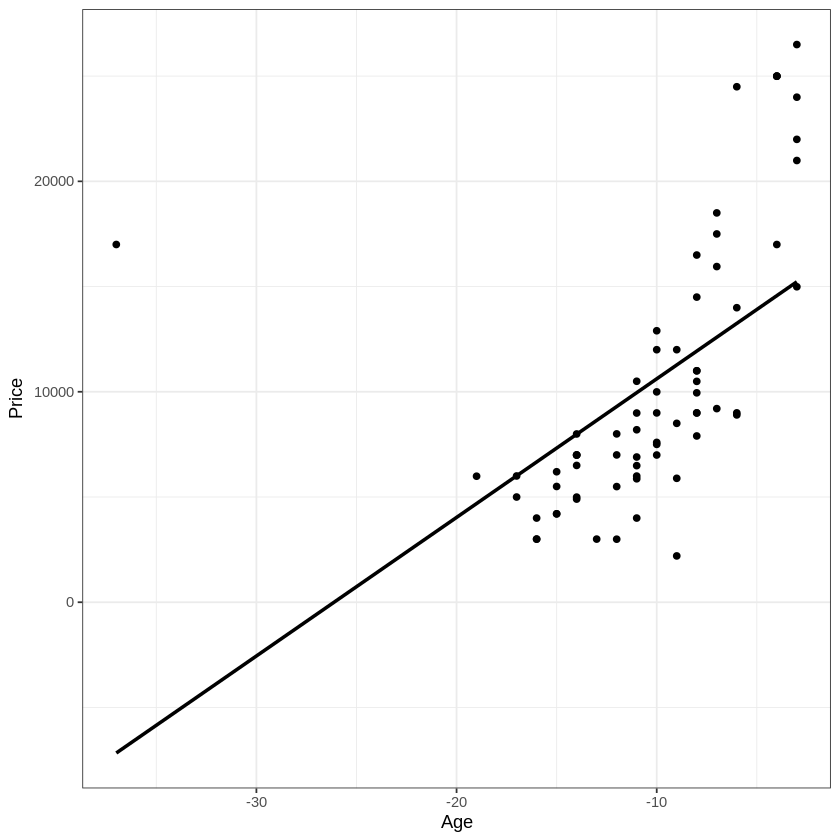

In [5]:
#Scatterplot of Price ~ Mile
  ggplot(data=ChevyImpala_NoMissingness, aes(x=Age,y=Price)) +
  geom_point() +
  geom_smooth(method='lm', formula = y ~ x, se=FALSE, col="black") +
  theme_bw()

Next, obtain an estimated regression model for $Price \sim Age$.

In [6]:
#Fitting Model: Price ~ Age
for(i in 1:nrows(ChevyImpala_NoMissingness)){
  slope[i] <- LinearModel_Price_Age <- lm(Price ~ Age, data=ChevyImpala_NoMissingness[-c(i),])$coefficients[2]
}


ERROR: Error in nrows(ChevyImpala_NoMissingness): could not find function "nrows"


Note the following:

* The estimated slope is $\hat{\beta}_{1} = 658.5$
* The estimated y-intercept is $\hat{\beta}_{0} = 17201.6$
* The $RMSE$ for this model is $\hat{\sigma} = 5431$

## DFBETAs

**DFBETAs** can be used to measure the influence of an observation on the estimated regression parameters.  DFBETAs measure or quantify the change in the estimated parameters due to a particular observation.  If a particular observation causes the estimated regression parameters to change a lot, then this observation is said to have high influence on the estimated model.





A $DFBETA$ calcuation is done by systematically removing one observation at a time, denoted by $(-i)$, and refitting the regression model without the $i^{th}$ observation.  The change in each of the estimated model coefficients is then computed.

$$DFBETA_{ij} = \hat{\beta}_{j} - \hat{\beta}_{j(-i)}$$

where $i=1,2,3,\ldots,n$ indicates the number of observations and $j=0,1,\ldots,k$ number of parameters in the regression model.

An alternative to the $DFBETA_{ij}$ computed above is to use a standardized version which simply divides by the standard error, i.e. $SE_{(-i)}(\hat{\beta}_{j})$

$$Std\_DFBETA_{ij} = \frac{\hat{\beta}_{j} - \hat{\beta}_{j(-i)}}{SE_{(-i)}(\hat{\beta}_{j})}$$

## DFBETA Algorithm

Step 1: Create an empty data.frame to hold the outcomes from the algorithm

In [7]:
DFBETA_Outcomes <-data.frame(rowid=numeric(), yintercept = numeric(), slope = numeric())

Step 2: Fit a model -- removing one observation at a time, put outcomes into  data.frame

In [8]:
#Note: 68 observations in the ChevyImpala_NoMissingness data.frame
for(i in 1:68){
  model_i <- lm(Price ~ Age, data=ChevyImpala_NoMissingness[-c(i), ])
  DFBETA_Outcomes[i,1] <- i
  DFBETA_Outcomes[i,2] <- model_i$coefficients[1]
  DFBETA_Outcomes[i,3] <- model_i$coefficients[2]
}

head(DFBETA_Outcomes)

,rowid,yintercept,slope
,<dbl>,<dbl>,<dbl>
1,1,16670.79,620.4351
2,2,16852.85,633.5066
3,3,17215.89,659.5714
4,4,16792.04,629.1407
5,5,16519.46,609.5704
6,6,17070.46,649.4912


Step 3: Compute the change in y-intercept and slope for each observation removed

In [9]:
DFBETA_Outcomes <- (DFBETA_Outcomes
                      %>% mutate(
                                  DFBeta_yint = (17201.6 - yintercept),
                                  DFBeta_slope = (658.5 - slope)
                                )
                   )

Step 4: Sort by the most change in the slope (or yintercept)

In [10]:
 (DFBETA_Outcomes
   %>% arrange(desc(abs(DFBeta_slope)))
   %>% head()
 )

,rowid,yintercept,slope,DFBeta_yint,DFBeta_slope
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,68,22984.34,1273.8027,-5782.7436,-615.30272
2,5,16519.46,609.5704,682.1377,48.92962
3,8,16638.67,619.6796,562.9269,38.82038
4,9,16638.67,619.6796,562.9269,38.82038
5,7,16638.94,619.6983,562.6571,38.80175
6,1,16670.79,620.4351,530.8111,38.06493


Creating an index plot for the Change in Slope

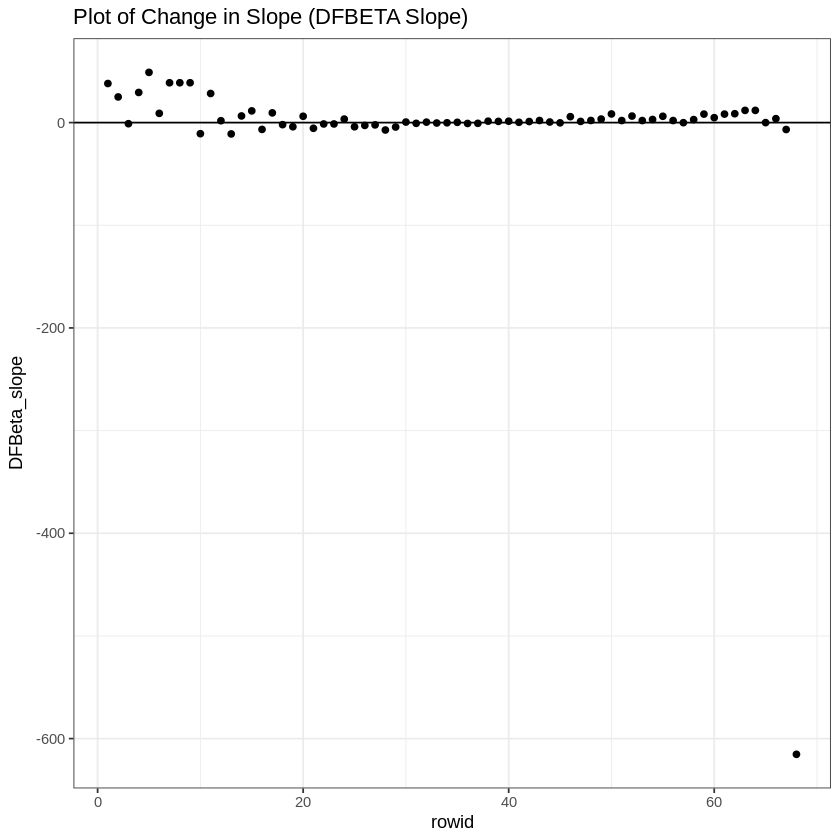

In [11]:
ggplot(data=DFBETA_Outcomes, aes(x=rowid,y=DFBeta_slope)) +
  geom_point() +
  ggtitle("Plot of Change in Slope (DFBETA Slope)") +
  geom_hline(yintercept=0) +
  theme_bw()

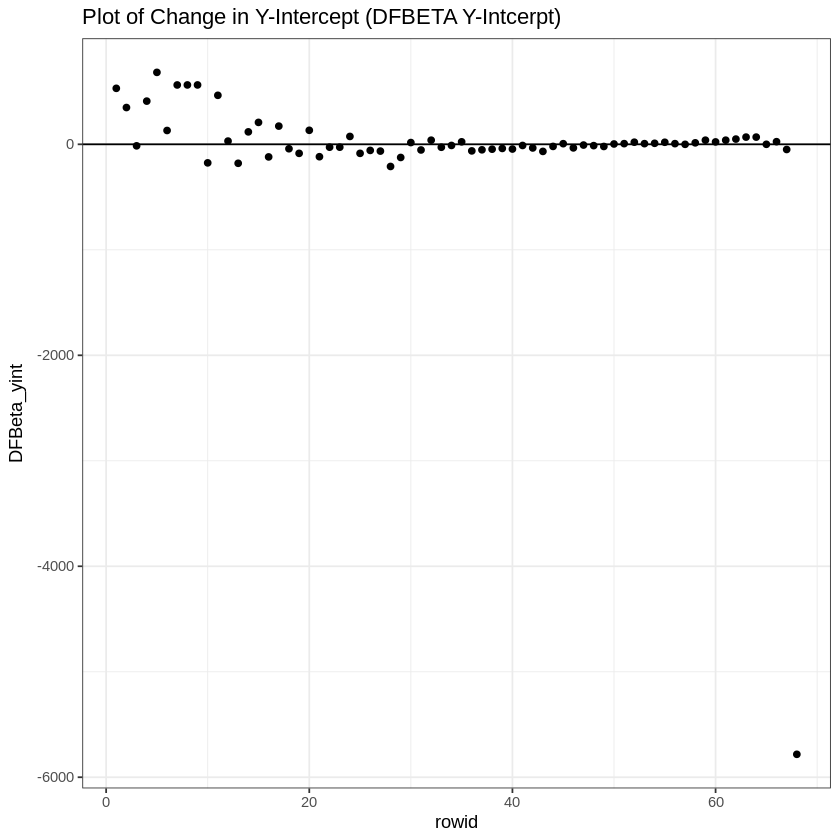

In [19]:
ggplot(data=DFBETA_Outcomes, aes(x=rowid,y=DFBeta_yint)) +
  geom_point() +
  ggtitle("Plot of Change in Y-Intercept (DFBETA Y-Intcerpt)") +
  geom_hline(yintercept=0) +
  theme_bw()

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

1.   Which observation (when removed) appears to have the largest impact on the estimated slope in this regression model?


2.   Which observation (when removed) appears to have the largest impact on the estimated y-intercept in this regression model?

In [27]:
DFFits_Outcomes <-data.frame(rowid=numeric(), yintercept = numeric(), slope = numeric())
for(i in 1:68){
model_i <- lm(Price ~ Miles, data = ChevyImpala[-c(i), ])
predict_i <- predict(model_i, newdata = ChevyImpala_NoMissingness [i, ])

DFFits_Outcomes[i,1] <- i
DFFits_Outcomes[i,2] <- ChevyImpala_NoMissingness[i, 2]
DFFits_Outcomes[i,3] <- predict(LinearModel_Price_Age, ChevyImpala_NoMissingness [i, ])
DFFits_Outcomes[i,4] <- predict_i

}
head(DFFits_Outcomes)

ERROR: Error: object 'LinearModel_Price_Age' not found


<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">&nbsp;</font></td></tr></table>

## Using the car() package to compute DFBETAs

Recall, the **car()** package is a commonly used package for regression analyses.  

**Note**:  This package contains a large number of dependency packages which means this package takes about **5 minutes** to install in COLAB.

In [15]:
#The car() package takes about 5 minutes to install in COLAB
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




Next, let's load the car() package into this COLAB session.

In [16]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




The dfbetaPlots() function can be used to create $DFBETA$ plots for the model parameters.  This function simply takes as its arguement a linear regression model.

In [20]:
dfbetaPlots(LinearModel_Price_Age)

ERROR: Error: object 'LinearModel_Price_Age' not found


Note:  The dfbeta**s**Plots() function can be used to create $DFBETA$ plots for the **standardized** model parameters.  

In [21]:
dfbetasPlots(LinearModel_Price_Age)

ERROR: Error: object 'LinearModel_Price_Age' not found


## Extending the Deletion Concept to Residuals

The idea of deleting an observation and determining its effect on a statistic is a general idea and is more commonly known the jackknife. [Link](https://https://en.wikipedia.org/wiki/Jackknife_resampling).

Consider the effect of removing an observation on the determination of whether or not an observation is an outlier in a regression model.  A **studentized residual** is a varition of a standardized residual where the estimated variance in the conditional distribution of $\bf{Y|X}$ is computed with $i^{th}$ observation removed.

The studentized residual for the $i^{th}$ observation is computed as follows.  This type of residual is sometimes called an <i>externally</i> studentized residual.
$$
\mbox{Studentized Residual}_{i} = \frac{\hat{e}_{i} - 0}{\sqrt{\hat{\sigma}^{2}_{(-i)}(1-h_{ii})}}
$$

This type of residual is actually the type used by the influencePlot() function from the car() package.

In [22]:
influencePlot(LinearModel_Price_Age)

ERROR: Error: object 'LinearModel_Price_Age' not found


## Extending the Deletion Concept to Predicted Values

The idea of a deletion statistic can be computed on the predicted values from a regression model.  This statistic is called the $DFFITS$.

**Task**:  Implement a $DFFITS$ algorithm for the $Price \sim Miles$ regression model.



---



---
End of Document

